In [1]:
import pandas as pd
# reading pre-formatted dataset
X_train = pd.read_csv("../../../dataset/base_train.csv") 
X_train = X_train.drop(columns=['Unnamed: 0'])

df_diagnosis = pd.read_csv("../../../dataset/base_train_answer.csv") 
df_diagnosis = df_diagnosis.drop(columns=['Unnamed: 0'])
y_train = df_diagnosis['diagnosis'].ravel()

# joining info and diagnosis into one df
df_full = pd.concat([df_diagnosis, X_train], axis=1)
df_full.head()

print(df_full.head())

print(X_train.shape)
print(y_train.shape)

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         B        10.26         14.71           66.20      321.6   
1         B        12.43         17.00           78.60      477.3   
2         M        17.20         24.52          114.20      929.4   
3         B        14.26         18.17           91.22      633.1   
4         B         7.76         24.54           47.92      181.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09882           0.09159         0.03581              0.02037   
1          0.07557           0.03454         0.01342              0.01699   
2          0.10710           0.18300         0.16920              0.07944   
3          0.06576           0.05220         0.02475              0.01374   
4          0.05263           0.04362         0.00000              0.00000   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1633  ...        10.880          19.48 

In [2]:
# normalizing test dataframe

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train), 
        index=X_train.index, 
        columns=X_train.columns
    )

print(X_train_scaled.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.155190      0.169090        0.154861   0.075546         0.416990   
1     0.257892      0.246534        0.240550   0.141591         0.207096   
2     0.483648      0.500845        0.486559   0.333362         0.491740   
3     0.344503      0.286101        0.327759   0.207678         0.118534   
4     0.036869      0.501522        0.028540   0.015907         0.000000   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.221489        0.083903             0.101243       0.289394   
1          0.046500        0.031443             0.084443       0.208081   
2          0.501871        0.396439             0.394831       0.437879   
3          0.100669        0.057990             0.068290       0.290404   
4          0.074351        0.000000             0.000000       0.266162   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

Best estimator: 1
    estimators     score
0          1.0  0.943718
1          2.0  0.887692
2          3.0  0.933462
3          4.0  0.923205
4          5.0  0.928333
5          6.0  0.913205
6          7.0  0.918205
7          8.0  0.892821
8          9.0  0.908077
9         10.0  0.897949
10        11.0  0.918333
11        12.0  0.913333
12        13.0  0.923333
13        14.0  0.887692
14        15.0  0.913205
15        16.0  0.897821
16        17.0  0.897821
17        18.0  0.897821
18        19.0  0.897821
19        20.0  0.892821
20        21.0  0.892821
21        22.0  0.892821
22        23.0  0.892821
23        24.0  0.882564
24        25.0  0.892692
25        26.0  0.882564
26        27.0  0.892692
27        28.0  0.887692
28        29.0  0.892692


<AxesSubplot:xlabel='estimators', ylabel='score'>

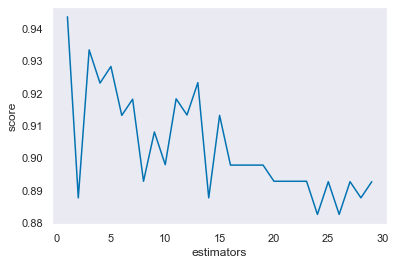

In [3]:
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators
result = []
best_score = 0
best_estimator = 0

for i in range(1, 30):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_scaled, y_train)
    s = make_scorer(recall_score, pos_label='M')
    scores = cross_val_score(modelK, X_train_scaled, y_train, cv=5, scoring=s)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')
print(df_scores)

sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

In [4]:
modelK = KNeighborsClassifier(n_neighbors=1)
modelK.fit(X_train_scaled, y_train)
s = make_scorer(recall_score, pos_label='M')
scores = cross_val_score(modelK, X_train_scaled, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(modelK, X_train_scaled, y_train, cv=5)
print("recall_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

recall_score: 0.94372 (+/- 0.04112)


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[299  17]
 [ 11 185]]
              precision    recall  f1-score   support

           B       0.96      0.95      0.96       316
           M       0.92      0.94      0.93       196

    accuracy                           0.95       512
   macro avg       0.94      0.95      0.94       512
weighted avg       0.95      0.95      0.95       512



## Validação final

In [6]:
import pandas as pd
# reading pre-formatted dataset
X_test = pd.read_csv("../../../dataset/base_test.csv") 
X_test = X_test.drop(columns=['Unnamed: 0'])

df_diagnosis_test = pd.read_csv("../../../dataset/base_test_answer.csv") 
df_diagnosis_test = df_diagnosis_test.drop(columns=['Unnamed: 0'])
y_test = df_diagnosis_test['diagnosis'].ravel()

print(X_test.shape)
print(y_test)

(57, 30)
['B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'M']


In [7]:
# normalizing validating dataframe
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_test_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_test), 
        index=X_test.index, 
        columns=X_test.columns
    )

print(X_test_scaled.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.383401      0.307362        0.378952   0.272930         0.389304   
1     0.214850      0.639441        0.213911   0.137827         0.007059   
2     0.746817      0.434175        0.757797   0.675166         0.626714   
3     0.587512      0.607738        0.595970   0.487111         0.287227   
4     0.531328      0.401397        0.512378   0.410479         0.380481   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.347309        0.255815             0.397646       0.508608   
1          0.321969        0.253770             0.280414       0.000000   
2          0.540428        0.701917             1.000000       0.422525   
3          0.398756        0.309808             0.706874       0.649211   
4          0.235122        0.187284             0.455273       0.209469   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [9]:
y_pred_test = modelK.predict(X_test_scaled)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[34  7]
 [ 0 16]]
              precision    recall  f1-score   support

           B       1.00      0.83      0.91        41
           M       0.70      1.00      0.82        16

    accuracy                           0.88        57
   macro avg       0.85      0.91      0.86        57
weighted avg       0.91      0.88      0.88        57

